In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

<h2>Define Hyper-parameters</h2>

In [3]:
#define number of training iterations
NUM_ITER = 25000
#define learning rate
lr = 0.01

<h2>Define your input data and expected labels</h2>

In [4]:
#define the training input data
x = np.array([[0,0],[1,0],[0,1],[1,1]],np.float32)
#define the target outputs/labels for AND gate
y = np.array([0,1,1,0],np.float32)
#y = np.array([0,1,1,1],np.float32)       (uncomment this line if you are doing OR gate)
y = np.reshape(y,[4,1])

<h2>Reset the graph before you re-train your neural net</h2>

In [5]:
#remember to reset the graph
tf.reset_default_graph()

<h2>Define placeholder and Variables</h2>

In [6]:
#define the placeholder to feed the training data later
X = tf.placeholder(tf.float32,shape=[4,2],name='X')
Y = tf.placeholder(tf.float32,shape=[4,1],name='Y')

<h2>Define training variables:</h2>

In [7]:
#Layers weight & bias
weights = {
    'W1': tf.Variable(tf.random_normal([2, 2]),name='W1'),
    'Wout': tf.Variable(tf.random_normal([2, 1]),name='Wout')
}

biases = {
    'b1': tf.Variable(tf.zeros(shape=[2]),name='b1'),
    'bout': tf.Variable(tf.zeros(shape=[1]),name='bout')
}

Instructions for updating:
Colocations handled automatically by placer.


<h2>Define the neural network</h2>

In [8]:
#define a neural net model
def neural_net(x, weights, biases):
    layer_1_out = tf.nn.sigmoid(tf.add(tf.matmul(x,weights['W1']),biases['b1']))
    out = tf.add(tf.matmul(layer_1_out,weights['Wout']),biases['bout'])
    return out

<h2>Define cost function</h2>

In [9]:
#predicted labels
logits = neural_net(X, weights, biases)

#define loss
loss = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y))
#define optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss)

#compare the predicted labels with true labels
correct_pred = tf.equal(tf.argmax(logits,1),tf.argmax(Y,1))

#compute the accuracy by taking average
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

#Initialize the variables
init = tf.global_variables_initializer()

<h2>Execute training</h2>

In [10]:
loss_list = []

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(NUM_ITER):
        #every iteration we run optimization on the training data X and labels Y
        sess.run([loss, train_op], feed_dict = {X:x,Y:y})
        
        if i % 1000 == 0:
            L = sess.run(loss, feed_dict={X:x,Y:y})
            loss_list.append(L)
            print(sess.run(tf.sigmoid(neural_net(x, weights, biases))))
    
    #after training, we acquire the weight and bias
    #np.squeeze plays a role to get rid of the redundant dimension [i.e.make (2,1) be (2,)]
    W1 = np.squeeze(sess.run(weights['W1']))
    Wout = np.squeeze(sess.run(weights['Wout']))
    b1 = np.squeeze(sess.run(biases['b1']))
    bout = np.squeeze(sess.run(biases['bout']))
    
    final_output = sess.run(tf.sigmoid(neural_net(x, weights, biases)))

[[0.5169994 ]
 [0.531974  ]
 [0.42467493]
 [0.4332504 ]]
[[0.5286034 ]
 [0.5751048 ]
 [0.44881013]
 [0.45523864]]
[[0.51100105]
 [0.6302072 ]
 [0.4276303 ]
 [0.43700922]]
[[0.4740605 ]
 [0.7158928 ]
 [0.40381858]
 [0.40122128]]
[[0.42193857]
 [0.78752327]
 [0.41203794]
 [0.34616005]]
[[0.33684114]
 [0.8310415 ]
 [0.5019102 ]
 [0.26008406]]
[[0.22020632]
 [0.87249154]
 [0.66681826]
 [0.16911036]]
[[0.14042583]
 [0.9064675 ]
 [0.7901137 ]
 [0.11052841]]
[[0.097294  ]
 [0.9291979 ]
 [0.85745716]
 [0.0780707 ]]
[[0.0727345 ]
 [0.94410276]
 [0.8952018 ]
 [0.05911553]]
[[0.05743867]
 [0.95426023]
 [0.9182665 ]
 [0.04709461]]
[[0.04717112]
 [0.96150124]
 [0.9334926 ]
 [0.0389213 ]]
[[0.03986964]
 [0.9668734 ]
 [0.9441728 ]
 [0.03305417]]
[[0.03444153]
 [0.9709939 ]
 [0.95202506]
 [0.02866116]]
[[0.03026298]
 [0.97424203]
 [0.9580157 ]
 [0.02526048]]
[[0.02695563]
 [0.97686183]
 [0.9627224 ]
 [0.02255672]]
[[0.02427763]
 [0.97901523]
 [0.9665105 ]
 [0.02035913]]
[[0.02206796]
 [0.98081434]
 [0

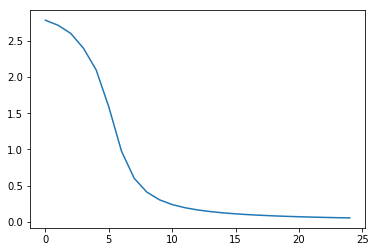

In [11]:
plt.plot(loss_list)

In [12]:
final_output, y

(array([[0.01264703],
        [0.98871875],
        [0.98271763],
        [0.01072294]], dtype=float32), array([[0.],
        [1.],
        [1.],
        [0.]], dtype=float32))

<h2>Plot</h2>

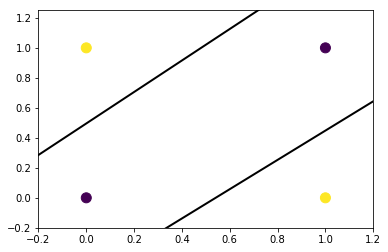

In [13]:
#plot out the decision line determined by learned weight and bias
plot_x = np.array([np.min(x[:, 0] - 0.2), np.max(x[:, 1]+0.2)])
plot_y1 = 1 / W1[1, 0] * (-W1[0, 0] * plot_x - b1[0])
plot_y2 = 1 / W1[1, 1] * (-W1[0, 1] * plot_x - b1[1])

plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(y), s=100, cmap='viridis')
plt.plot(plot_x, plot_y1, color='k', linewidth=2)
plt.plot(plot_x, plot_y2, color='k', linewidth=2)
plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
plt.show()